In [722]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [723]:
data = pd.read_csv('./WPP2022_Demographic_Indicators_Medium.csv')
select_data = data[['Location', 'Time', 'TPopulation1Jan']]

C:\Users\Shiyun\AppData\Local\Temp\ipykernel_14556\2130983489.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('./WPP2022_Demographic_Indicators_Medium.csv')


In [724]:
India_data = select_data[(select_data['Location'] == 'India') & (select_data['Time'] % 5 == 0) & (select_data['Time'] <= 2020)]
China_data = select_data[(select_data['Location'] == 'China') & (select_data['Time'] % 5 == 0) & (select_data['Time'] <= 2020)]
America_data = select_data[(select_data['Location'] == 'United States of America') & (select_data['Time'] % 5 == 0) & (select_data['Time'] <= 2020)]
Europe_data = select_data[(select_data['Location'] == 'Europe') & (select_data['Time'] % 5 == 0) & (select_data['Time'] <= 2020)]
Russian_data = select_data[(select_data['Location'] == 'Russian Federation') & (select_data['Time'] % 5 == 0) & (select_data['Time'] <= 2020)]
Thailand_data = select_data[(select_data['Location'] == 'Thailand') & (select_data['Time'] % 5 == 0) & (select_data['Time'] <= 2020)]
Iceland_data = select_data[(select_data['Location'] == 'Iceland') & (select_data['Time'] % 5 == 0) & (select_data['Time'] <= 2020)]

In [725]:
time = np.array(India_data['Time'])
India_population = np.array(India_data['TPopulation1Jan'])
China_population = np.array(China_data['TPopulation1Jan'])
America_population = np.array(America_data['TPopulation1Jan'])
Europe_population = np.array(Europe_data['TPopulation1Jan'])
Russian_population = np.array(Russian_data['TPopulation1Jan'])
Thailand_population = np.array(Thailand_data['TPopulation1Jan'])
Iceland_population = np.array(Iceland_data['TPopulation1Jan'])

Line plot

In [726]:
countries = ['China', 'Europe', 'India', 'America', 'Russian', 'Thailand']
populations = [China_population, Europe_population, India_population, America_population, Russian_population, Thailand_population]
colors = ['red', 'green', 'blue', 'deeppink', 'deepskyblue', 'orange']

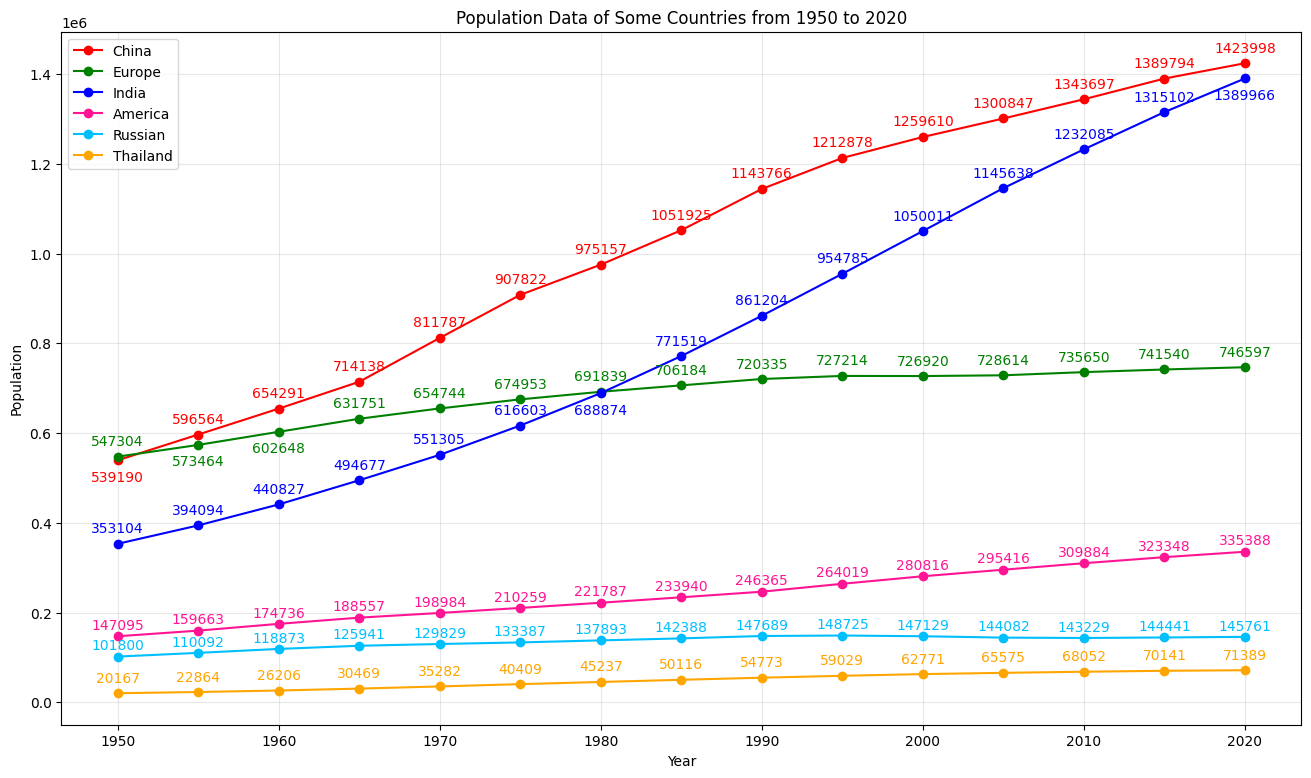

In [727]:
# draw line plot
plt.figure(figsize=(16, 9))
for i in range(len(countries)):
    plt.plot(time, populations[i], label=countries[i], color=colors[i], marker='o', linestyle='-')
for i in range(len(countries)):
    for j in range(len(time)):
        if (i == 2 and (j == 6 or j == 14)) or (i == 0 and j == 0) or (i == 1 and (j == 1 or j == 2)):
            plt.annotate(int(populations[i][j]), (time[j], populations[i][j]), textcoords='offset points', xytext=(0, -15), ha='center', color=colors[i])
        elif i == 3 or i == 4:
            plt.annotate(int(populations[i][j]), (time[j], populations[i][j]), textcoords='offset points', xytext=(0, 5), ha='center', color=colors[i])
        else:
            plt.annotate(int(populations[i][j]), (time[j], populations[i][j]), textcoords='offset points', xytext=(0, 8), ha='center', color=colors[i])


plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population Data of Some Countries from 1950 to 2020')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

Stem plot

In [728]:
# preprocess data
stem_time = time[1:]
stem_population_increase_rates = []
for population in populations:
    cur_increase_rates = []
    for i in range(len(population)-1):
        cur_increase_rate = round((population[i+1] - population[i]) / population[i], 3)
        cur_increase_rates.append(cur_increase_rate)
    stem_population_increase_rates.append(cur_increase_rates)

China_rate, Europe_rate, India_rate, America_rate, Russian_rate, Thailand_rate = stem_population_increase_rates
stem_countries = ['Thailand', 'India', 'China', 'America', 'Russian', 'Europe']
stem_population_increase_rates = [Thailand_rate, India_rate, China_rate, America_rate, Russian_rate, Europe_rate]
stem_colors = ['orange', 'blue', 'red', 'deeppink', 'deepskyblue', 'green']

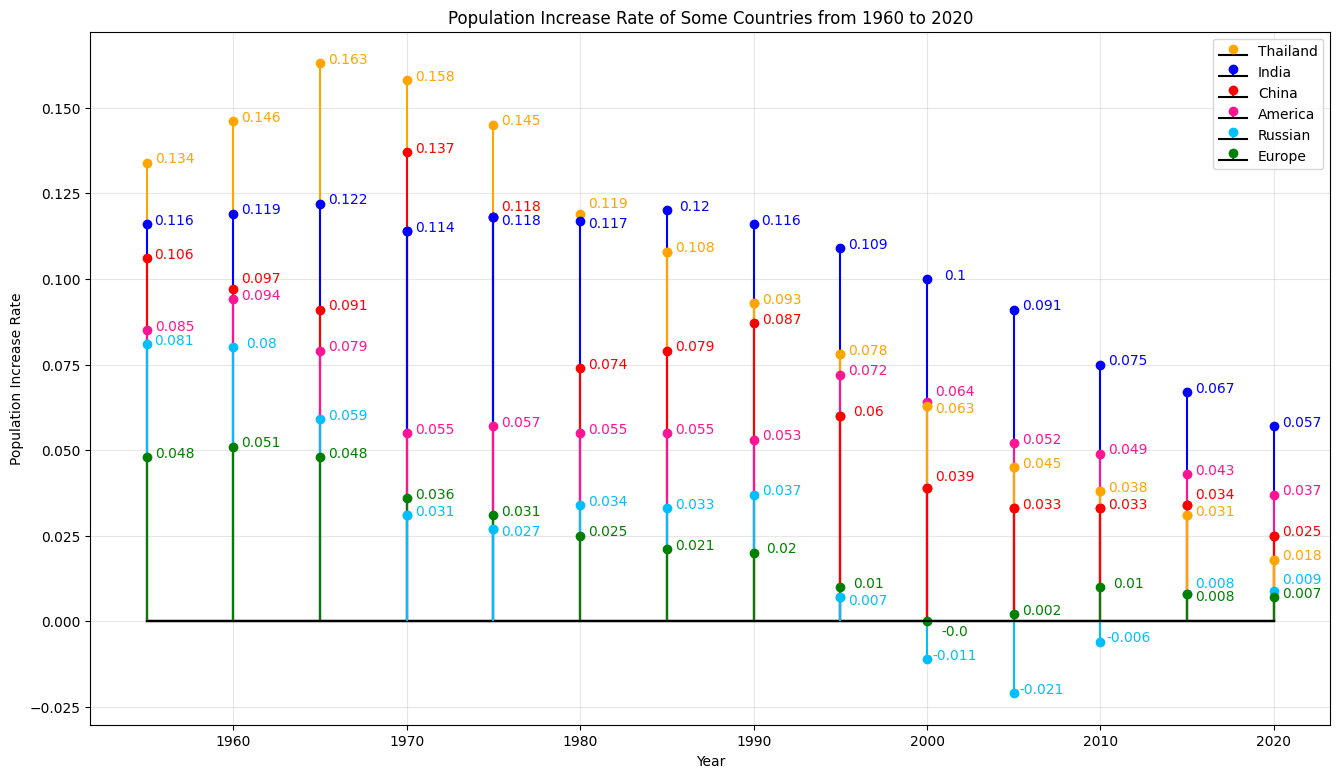

In [729]:
# draw stem plot
plt.figure(figsize=(16, 9))
for i in range(len(stem_countries)):
    plt.stem(stem_time, stem_population_increase_rates[i], label=stem_countries[i], markerfmt=stem_colors[i], basefmt='k-', linefmt=stem_colors[i], bottom=0)
    if i == 1:
        for t in [6, 7, 8]:
            plt.stem(stem_time[t], stem_population_increase_rates[0][t], label=None, markerfmt=stem_colors[0], basefmt='k-', linefmt=stem_colors[0], bottom=0)
    if i == 2:
        for t in [3, 4]:
            plt.stem(stem_time[t], stem_population_increase_rates[1][t], label=None, markerfmt=stem_colors[1], basefmt='k-', linefmt=stem_colors[1], bottom=0)
    if i == 3:
        for t in [9, 10, 11]:
            plt.stem(stem_time[t], stem_population_increase_rates[0][t], label=None, markerfmt=stem_colors[0], basefmt='k-', linefmt=stem_colors[0], bottom=0)
        for t in [8, 9, 10, 11, 12, 13]:
            plt.stem(stem_time[t], stem_population_increase_rates[2][t], label=None, markerfmt=stem_colors[2], basefmt='k-', linefmt=stem_colors[2], bottom=0)
        for t in [12, 13]:
            plt.stem(stem_time[t], stem_population_increase_rates[0][t], label=None, markerfmt=stem_colors[0], basefmt='k-', linefmt=stem_colors[0], bottom=0)
    if i == 5:
        for t in [3, 4, 8]:
            plt.stem(stem_time[t], stem_population_increase_rates[4][t], label=None, markerfmt=stem_colors[4], basefmt='k-', linefmt=stem_colors[4], bottom=0)
for i in range(len(stem_countries)):
    for j in range(len(stem_time)):
        if (i == 0 and j == 5) or (i == 2 and (j == 1 or j == 4 or j == 9 or j == 12)) or (i == 3 and j == 9) or (i == 4 and (j == 12 or j == 13)):
            plt.annotate(float(stem_population_increase_rates[i][j]), (stem_time[j], stem_population_increase_rates[i][j]), textcoords='offset points', xytext=(20, 5), ha='center', color=stem_colors[i])
        elif (i == 0 and j == 9) or (i == 1 and (j == 4 or j == 5)) or (i == 4 and (j == 4 or j == 8)) or (i == 5 and j == 12):
            plt.annotate(float(stem_population_increase_rates[i][j]), (stem_time[j], stem_population_increase_rates[i][j]), textcoords='offset points', xytext=(20, -5), ha='center', color=stem_colors[i])
        elif i == 5 and j == 9:
            plt.annotate(float(stem_population_increase_rates[i][j]), (stem_time[j], stem_population_increase_rates[i][j]), textcoords='offset points', xytext=(20, -10), ha='center', color=stem_colors[i])
        else:
            plt.annotate(float(stem_population_increase_rates[i][j]), (stem_time[j], stem_population_increase_rates[i][j]), textcoords='offset points', xytext=(20, 0), ha='center', color=stem_colors[i])

plt.xlabel('Year')
plt.ylabel('Population Increase Rate')
plt.title('Population Increase Rate of Some Countries from 1960 to 2020')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

Bar Plot

In [730]:
countries = ['Thailand', 'Russian', 'America', 'Europe', 'India', 'China']
populations = [Thailand_population, Russian_population, America_population, Europe_population, India_population, China_population]
colors = ['#C28647', '#D7BFE6', '#A0E8D1', 'pink', '#F8E589', 'lightskyblue']

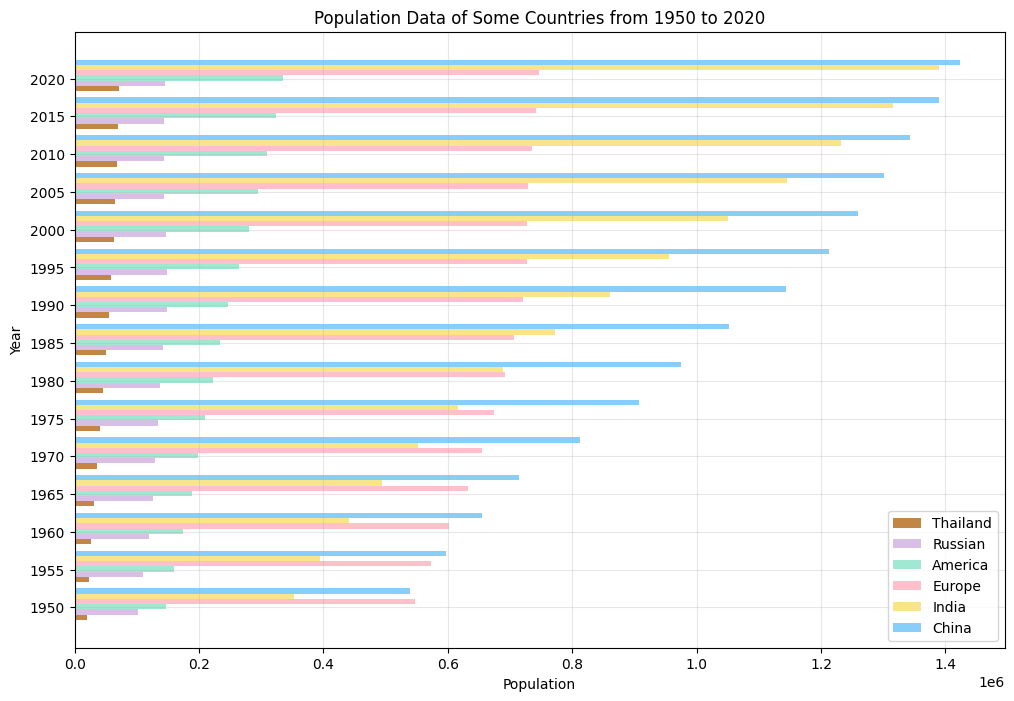

In [731]:
# draw bar plot
padding = 1
width = 0.8
bar_width = np.arange(len(time)) * (len(list(countries)) * width + padding)

plt.figure(figsize=(8, 12))
for i in range(len(countries)):
    plt.barh(bar_width + width * i, populations[i], label=countries[i], color=colors[i])

plt.xlabel('Population')
plt.ylabel('Year')
plt.yticks(bar_width + 1.5, list(time))
plt.title('Population Data of Some Countries from 1950 to 2020')
plt.legend()
plt.grid(alpha=0.3)
plt.show()